The purpose of this file is to plot the data of the IPCC assessed scenarios found on this link 

AR6

https://data.ene.iiasa.ac.at/ar6/#/downloads

Date 23 July 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 


c:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [49]:
#read the dataframe 
ipcc = pd.read_excel('AR6_Scenarios_Database_metadata_indicators_v1.0_indicatores_categories_23Aug2022.xlsx')

In [3]:
ipcc.head()

,Model,Scenario,Category,Category_name,Category_subset,Subset_Ch4,Category_Vetting_historical,IMP_marker,Literature Reference (if applicable),Policy_category,...,Median year of peak warming (FaIRv1.6.2),Exceedance Probability 1.5C (MAGICCv7.5.3),Exceedance Probability 1.5C (FaIRv1.6.2),Exceedance Probability 2.0C (MAGICCv7.5.3),Exceedance Probability 2.0C (FaIRv1.6.2),Exceedance Probability 3.0C (MAGICCv7.5.3),Exceedance Probability 3.0C (FaIRv1.6.2),IMP_color_rgb,IMP_color_hex,Category_color_rgb
0,AIM/CGE 2.0,SSP1-26,C3,C3: limit warming to 2°C (>67%),C3a_Immediate_Action,NaN,C3,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2070.0,0.745000,0.599911,0.213333,0.121591,0.006667,0.001788,NaN,NaN,"111, 120, 153"
1,AIM/CGE 2.0,SSP1-34,C5,C5: limit warming to 2.5°C (>50%),C5,NaN,C5,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2100.0,0.935000,0.931158,0.576667,0.463120,0.088333,0.022351,NaN,NaN,"140, 167, 208"
2,AIM/CGE 2.0,SSP1-45,C6,C6: limit warming to 3°C (>50%),C6,NaN,C6,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2100.0,0.998333,0.996424,0.900000,0.836388,0.280000,0.144837,NaN,NaN,"250, 193, 130"
3,AIM/CGE 2.0,SSP1-Baseline,C7,C7: limit warming to 4°C (>50%),C7,NaN,C7,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P1a,...,2100.0,1.000000,1.000000,0.996667,0.990612,0.731667,0.502012,NaN,NaN,"241, 136, 114"
4,AIM/CGE 2.0,SSP4-26,C3,C3: limit warming to 2°C (>67%),C3a_Immediate_Action,NaN,C3,NaN,https://doi.org/10.1016/j.gloenvcha.2016.05.009,P2a,...,2070.0,0.690000,0.580688,0.150000,0.082700,0.000000,0.000447,NaN,NaN,"111, 120, 153"


In [6]:
# get a list of energy variables 

energy_variables = ['Primary Energy', 'Primary Energy|Nuclear', 'Primary Energy|Oil', 'Primary Energy|Coal', 'Primary Energy|Gas', 'Primary Energy|Hydro', 'Primary Energy|Wind', 'Primary Energy|Solar']

In [9]:
ipcc.columns

Index(['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'Subset_Ch4', 'Category_Vetting_historical', 'IMP_marker',
       'Literature Reference (if applicable)', 'Policy_category',
       'Policy_category_name', 'Project_study', 'CO2 emissions 2030 Gt CO2/yr',
       'CO2 emissions 2050 Gt CO2/yr', 'CO2 emissions 2100 Gt CO2/yr', 'COVID',
       'GDP|MER-per-capita-in-2100', 'GDP|MER-per-capita-in-2100_bin',
       'GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'GHG emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2040 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2050 % modelled Ha

In [4]:
ipcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 76 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Model                                                                      1202 non-null   object 
 1   Scenario                                                                   1202 non-null   object 
 2   Category                                                                   1202 non-null   object 
 3   Category_name                                                              1202 non-null   object 
 4   Category_subset                                                            1202 non-null   object 
 5   Subset_Ch4                                                                 66 non-null     object 
 6   Category_Vetting_historical                             

In [5]:
ipcc.shape

(1202, 76)

In [10]:
interesting_columns = ['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'IMP_marker','Policy_category',
       'Policy_category_name', 'CO2 emissions 2030 Gt CO2/yr',
       'CO2 emissions 2050 Gt CO2/yr', 'CO2 emissions 2100 Gt CO2/yr', 'COVID',
       'GDP|MER-per-capita-in-2100', 'GDP|MER-per-capita-in-2100_bin',
       'GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'GHG emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       
       'CO2 emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CH4 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CH4 emissions reductions 2019-2050 % modelled Harmonized-Infilled',
      
       'Year of 50% CO2 emissions reductions 2019 modelled vs Harmonized-Infilled',
       'Peak Emissions|CO2', 'Peak Emissions|GHGs', 
       'Scenario_family', 'Scenario_scope', 'Sectoral_scope', 'Ssp_family',
       'Technology_category_name',
       'Year of peak CO2 Emissions (Harm-Infilled)',
       'Year of peak GHG Emissions',
       'Year of netzero CO2 emissions (Harm-Infilled) table',
       'Year of netzero GHG emissions (Harm-Infilled) table',
       
       'Median peak warming (MAGICCv7.5.3)',
       'Median warming in 2100 (MAGICCv7.5.3)',
       'Median year of peak warming (MAGICCv7.5.3)',
       
       'Median warming in 2100 (FaIRv1.6.2)',
       'Median year of peak warming (FaIRv1.6.2)',
       'Exceedance Probability 1.5C (MAGICCv7.5.3)',
       'Exceedance Probability 1.5C (FaIRv1.6.2)',
       'Exceedance Probability 2.0C (MAGICCv7.5.3)',
       'Exceedance Probability 2.0C (FaIRv1.6.2)',
       'Exceedance Probability 3.0C (MAGICCv7.5.3)',
       'Exceedance Probability 3.0C (FaIRv1.6.2)']

In [50]:
ipcc = ipcc[interesting_columns]

In [13]:
ipcc.columns

Index(['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'IMP_marker', 'Policy_category', 'Policy_category_name',
       'CO2 emissions 2030 Gt CO2/yr', 'CO2 emissions 2050 Gt CO2/yr',
       'CO2 emissions 2100 Gt CO2/yr', 'COVID', 'GDP|MER-per-capita-in-2100',
       'GDP|MER-per-capita-in-2100_bin',
       'GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infilled)',
       'GHG emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'GHG emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CO2 emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'CH4 emissions reductions 2019-2030 % modelled Harmonized-Infilled',
       'CH4 emissions reductions 2019-2050 % modelled Harmonized-Infilled',
       'Year 

In [24]:
# select only categorical data "objects"

ipcc_catagorical=ipcc.select_dtypes(include=['object'])

In [25]:
ipcc_catagorical.columns

Index(['Model', 'Scenario', 'Category', 'Category_name', 'Category_subset',
       'IMP_marker', 'Policy_category', 'Policy_category_name',
       'GDP|MER-per-capita-in-2100_bin', 'Scenario_family', 'Scenario_scope',
       'Sectoral_scope', 'Technology_category_name'],
      dtype='object')

In [28]:
for i in cat_columns:
    print('____ ')
    print(' ___')
    print(' ___')
    print(i)
    print(ipcc_catagorical[i].value_counts())

____ 
 ___
 ___
Model
MESSAGEix-GLOBIOM_1.1        170
REMIND-MAgPIE 2.1-4.2        106
WITCH 5.0                     86
POLES ENGAGE                  70
COFFEE 1.1                    65
REMIND 2.1                    60
REMIND-MAgPIE 1.7-3.0         58
IMAGE 3.0.1                   56
MESSAGE-GLOBIOM 1.0           48
TIAM-ECN 1.1                  45
GEM-E3_V2021                  41
GCAM 5.3                      40
IMAGE 3.2                     40
AIM/CGE 2.2                   34
IMAGE 3.0                     30
MESSAGEix-GLOBIOM_GEI 1.0     20
MESSAGEix-GLOBIOM_1.2         19
REMIND-MAgPIE 1.5             17
REMIND 1.7                    17
IMAGE 3.0.2                   16
REMIND 1.6                    15
POLES EMF33                   14
POLES ADVANCE                 10
WITCH-GLOBIOM 4.2             10
POLES GECO2019                10
MESSAGEix-GLOBIOM 1.0          9
POLES EMF30                    9
REMIND-MAgPIE 2.1-4.3          8
REMIND-Transport 2.1           8
AIM/CGE 2.0          

**Category subset** columns is a category of the category column - more usbsets of the **C3 category**

filter on:\
Sectoral_scope\
integrated/energy-emissions    1190

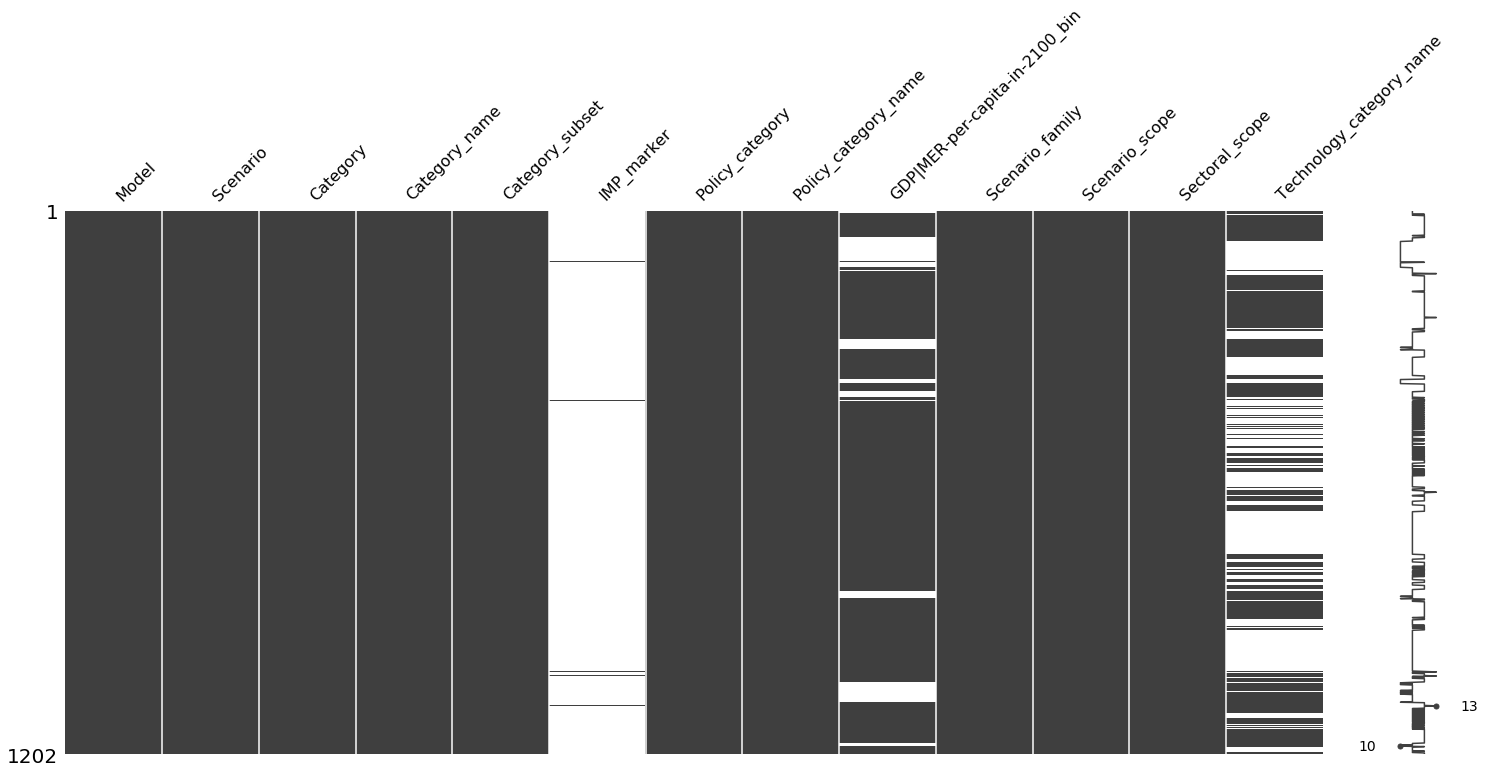

In [51]:
import missingno as msno
msno.matrix(ipcc_catagorical)

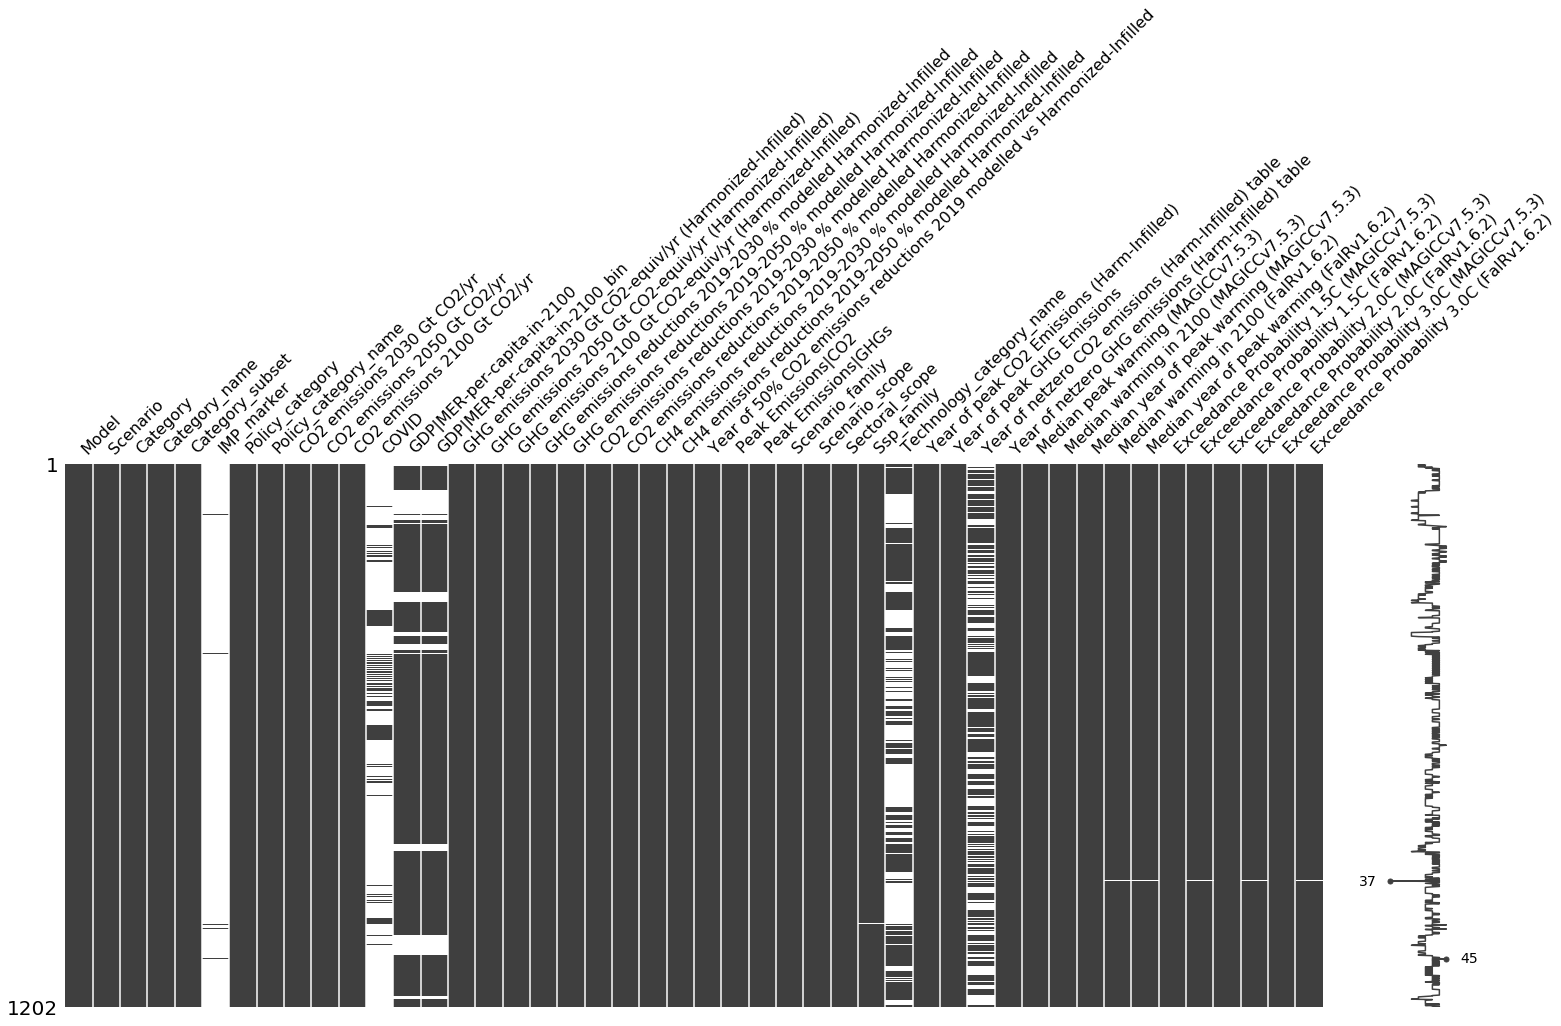

In [52]:
msno.matrix(ipcc)

In [53]:
# drop empty columns 

ipcc = ipcc.drop(columns=['IMP_marker','GDP|MER-per-capita-in-2100_bin', 'GDP|MER-per-capita-in-2100',
'Year of netzero CO2 emissions (Harm-Infilled) table', 'COVID', 'Technology_category_name'])


In [54]:
ipcc.isnull().sum()

Model                                                                        0
Scenario                                                                     0
Category                                                                     0
Category_name                                                                0
Category_subset                                                              0
Policy_category                                                              0
Policy_category_name                                                         0
CO2 emissions 2030 Gt CO2/yr                                                 0
CO2 emissions 2050 Gt CO2/yr                                                 0
CO2 emissions 2100 Gt CO2/yr                                                 0
GHG emissions 2030 Gt CO2-equiv/yr (Harmonized-Infilled)                     0
GHG emissions 2050 Gt CO2-equiv/yr (Harmonized-Infilled)                     0
GHG emissions 2100 Gt CO2-equiv/yr (Harmonized-Infil

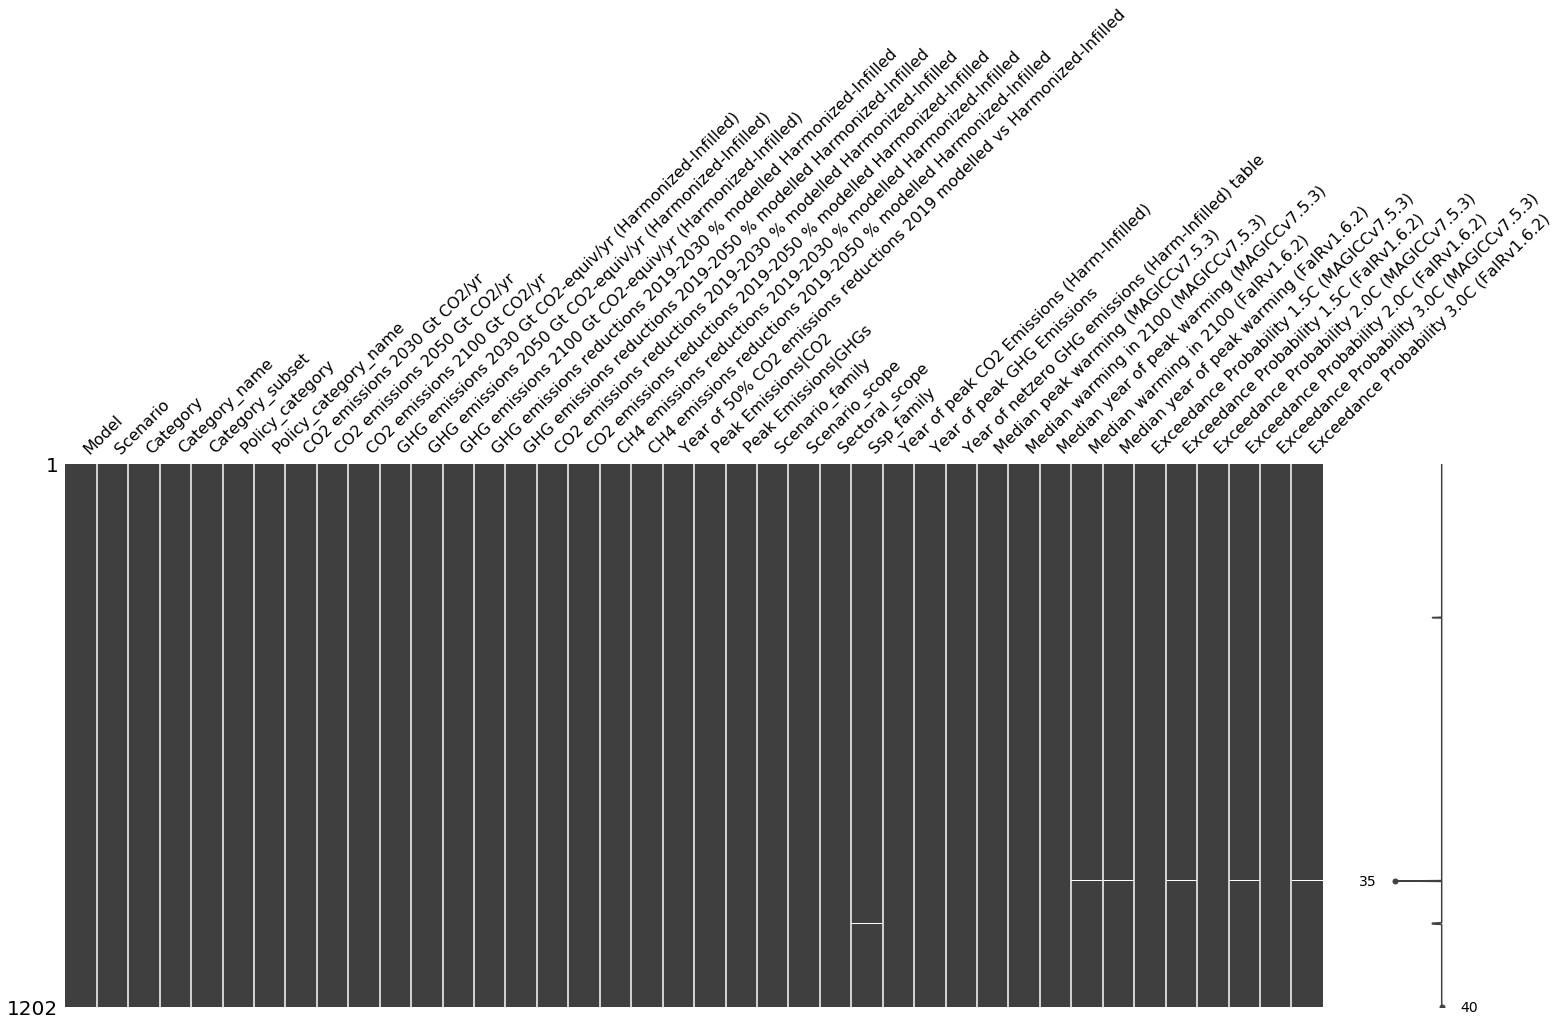

In [55]:
msno.matrix(ipcc)

In [56]:
ipcc_c = ipcc.dropna()

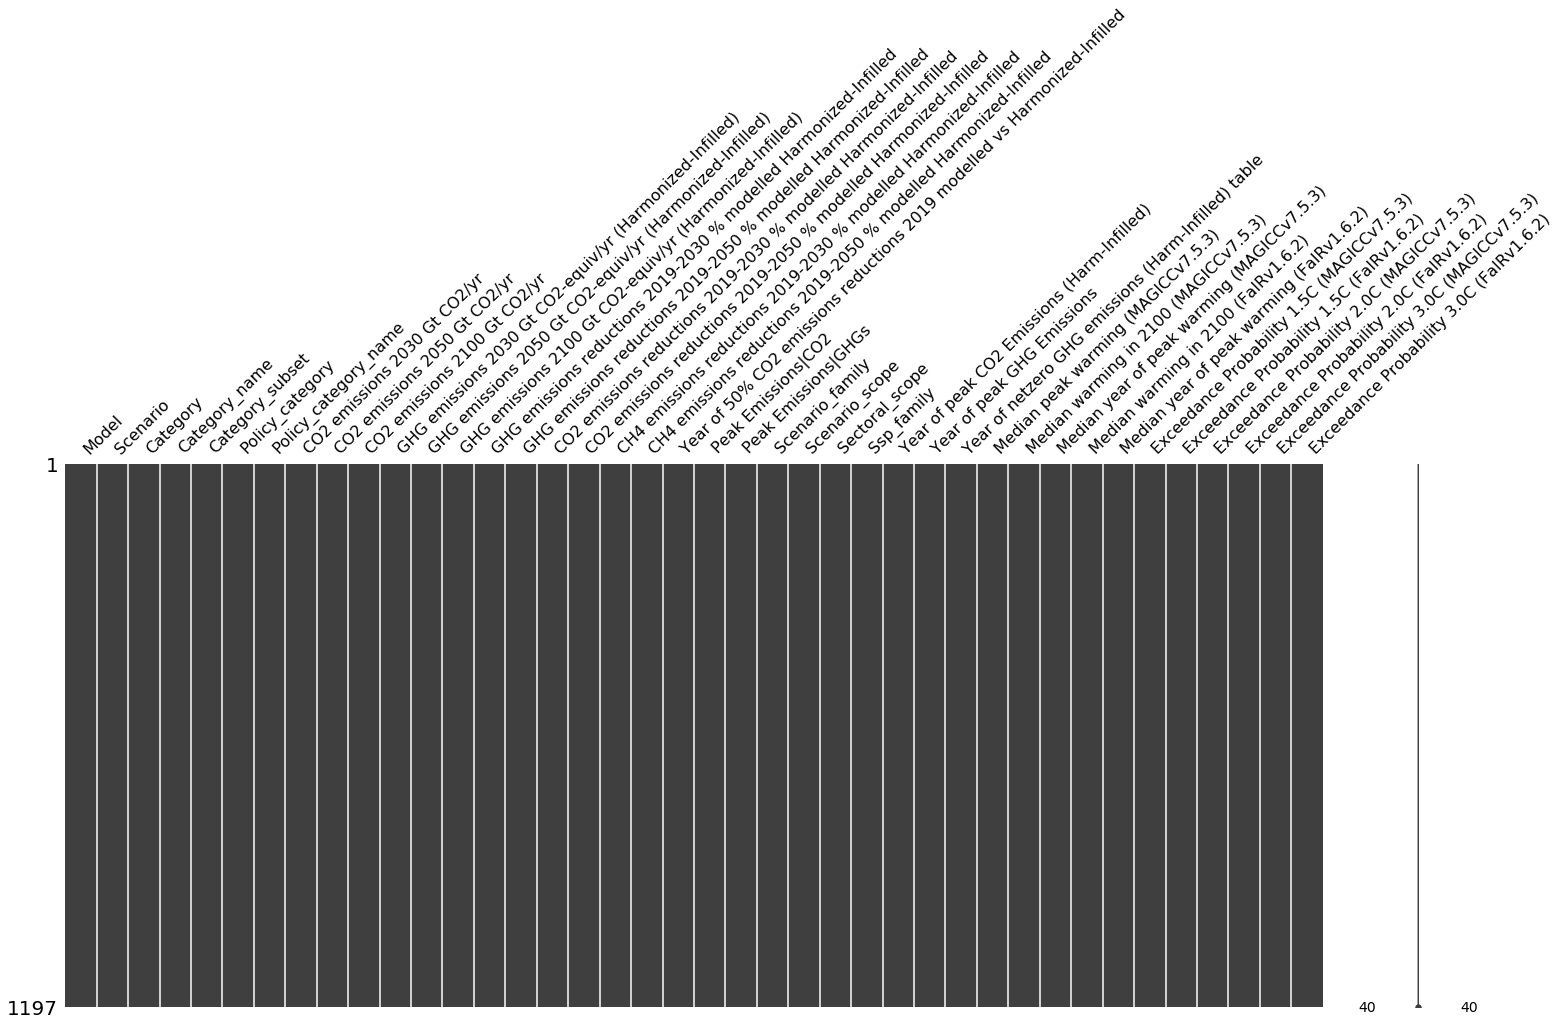

In [58]:
# confirm cleaning of the dataset
msno.matrix(ipcc_c)

## Plotting the outcome of energy scenarioes

In [64]:
## categorical ipcc_c and numerical ipcc_c

nu_ipcc_c = ipcc_c.select_dtypes(include='float64')
cat_ipcc_c = ipcc_c.select_dtypes(include='object')

In [67]:

list(cat_ipcc_c.columns)

['Model',
 'Scenario',
 'Category',
 'Category_name',
 'Category_subset',
 'Policy_category',
 'Policy_category_name',
 'Scenario_family',
 'Scenario_scope',
 'Sectoral_scope']

In [68]:
nu_cols = list(nu_ipcc_c.columns)
cat_cols = list(cat_ipcc_c.columns)

KeyboardInterrupt: 

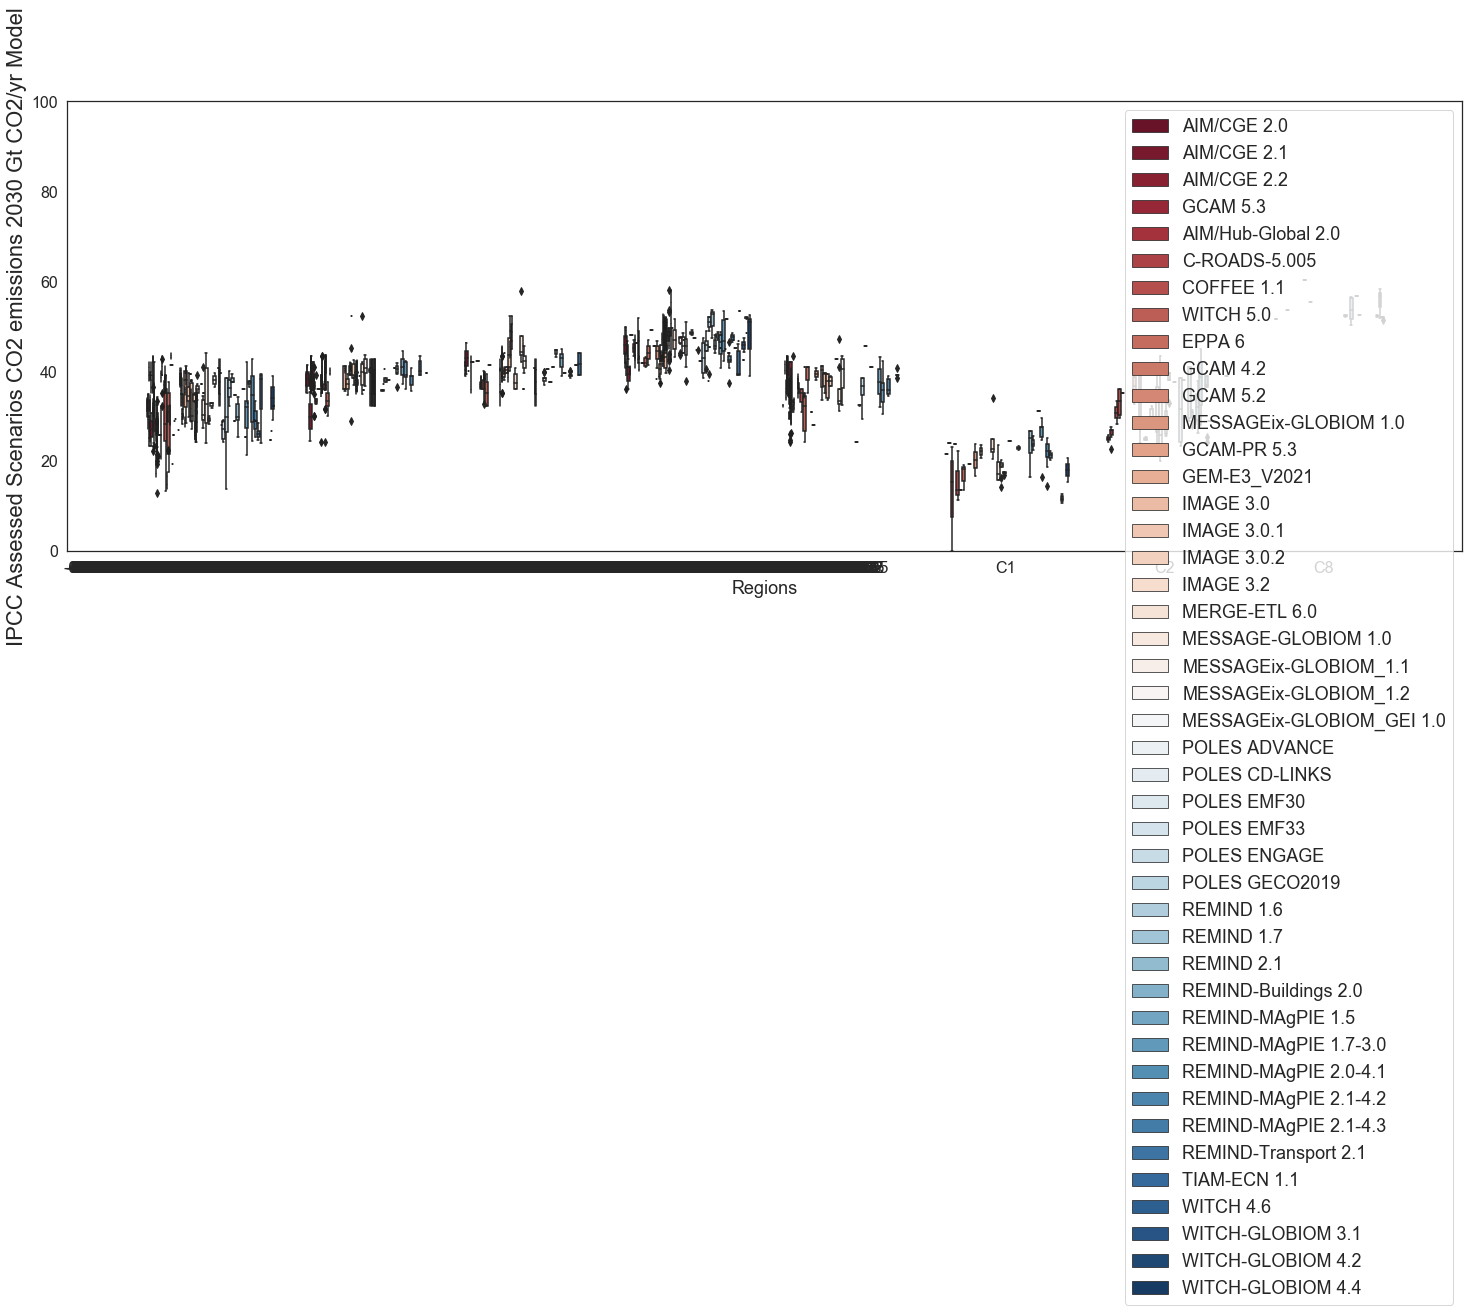

In [69]:

for i_nu in nu_cols:
    for x_cat in cat_cols:
        
        # change picture size of the resulting graph
        sns.set(rc={'figure.figsize':(25,8.27)})


        # change the background color
        sns.set_style("white")

        #plot energy data 
        sns.boxplot(x='Category', y=i_nu, data=ipcc_c, hue = x_cat, palette='RdBu')
        plt.ylabel('IPCC Assessed Scenarios' + ' '+ i_nu+ ' '+ x_cat, size = 22)
        plt.yticks(size = 20)
        plt.yticks(size = 16)
        plt.ylim(0, 100)

        plt.xlabel('Regions', size = 18)
        plt.xticks(size = 16);

        plt.legend(prop={'size': 18})

        plt.show()

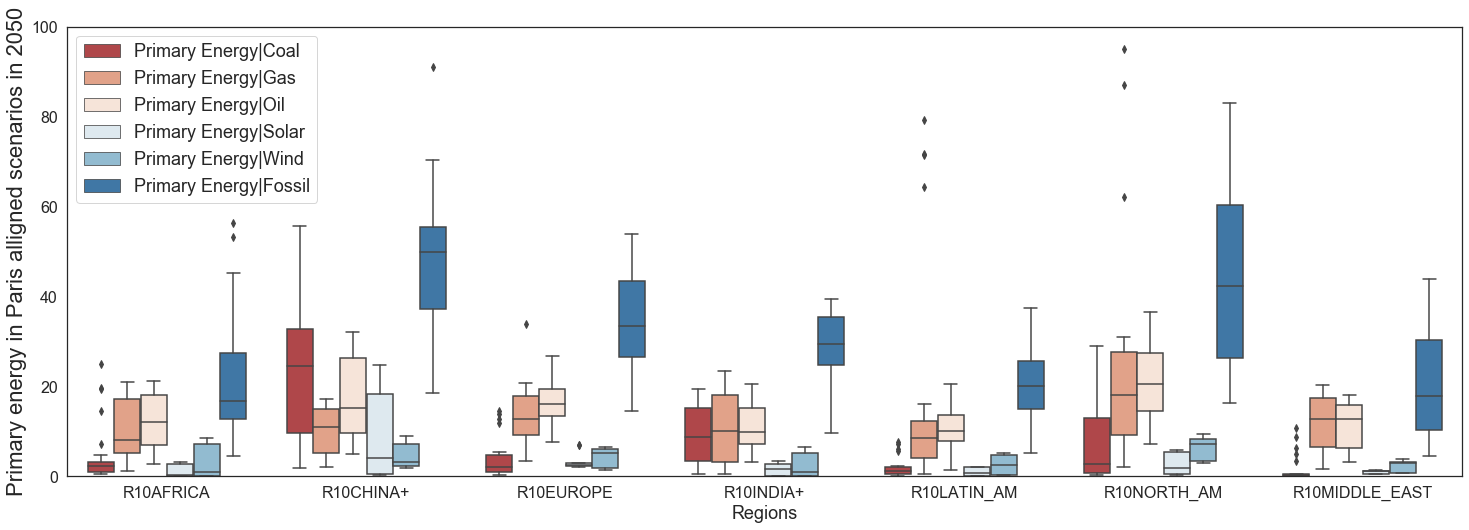

In [70]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(25,8.27)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(x='Category', y=2050, data=ipcc_s_r, hue = "variable", palette='RdBu')
plt.ylabel('Primary energy in Paris alligned scenarios in 2050', size = 22)
plt.yticks(size = 20)
plt.yticks(size = 16)
plt.ylim(0, 100)

plt.xlabel('Regions', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


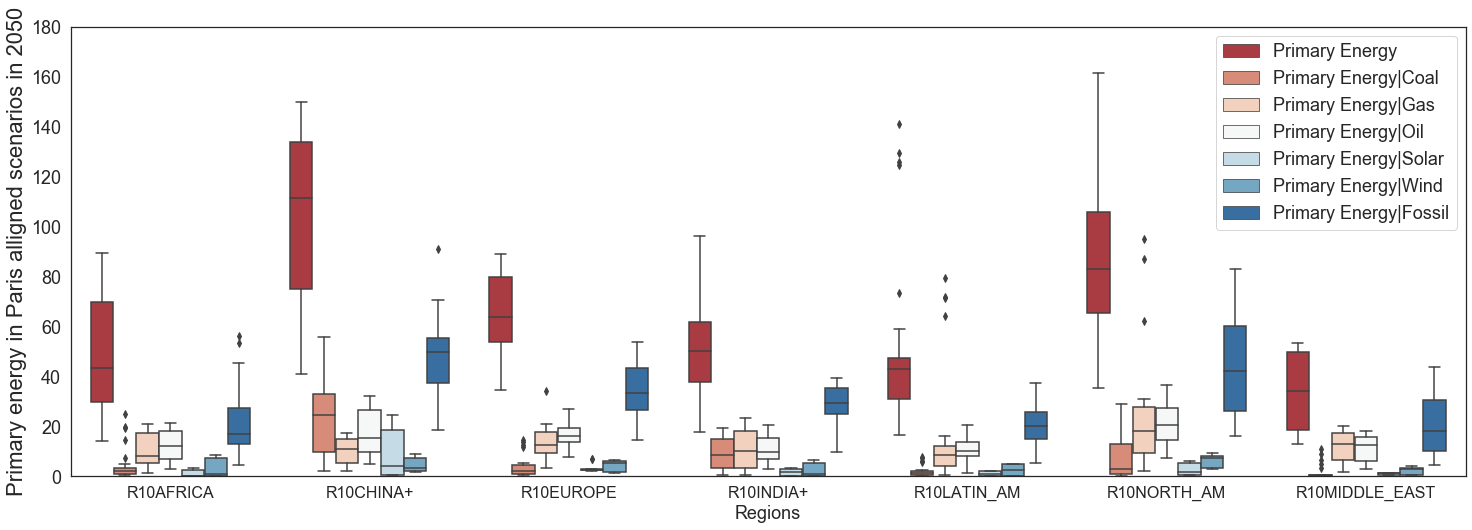

In [78]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(25,8.27)})


# change the background color
sns.set_style("white")

# this plot takes into account total primary energy 

#plot energy data 
sns.boxplot(x='region', y=2050, data=ipcc_s_r_, hue = "variable", palette='RdBu')
plt.ylabel('Primary energy in Paris alligned scenarios in 2050', size = 22)
plt.yticks(size = 20)
plt.yticks(size = 18)
plt.ylim(0, 180)

plt.xlabel('Regions', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


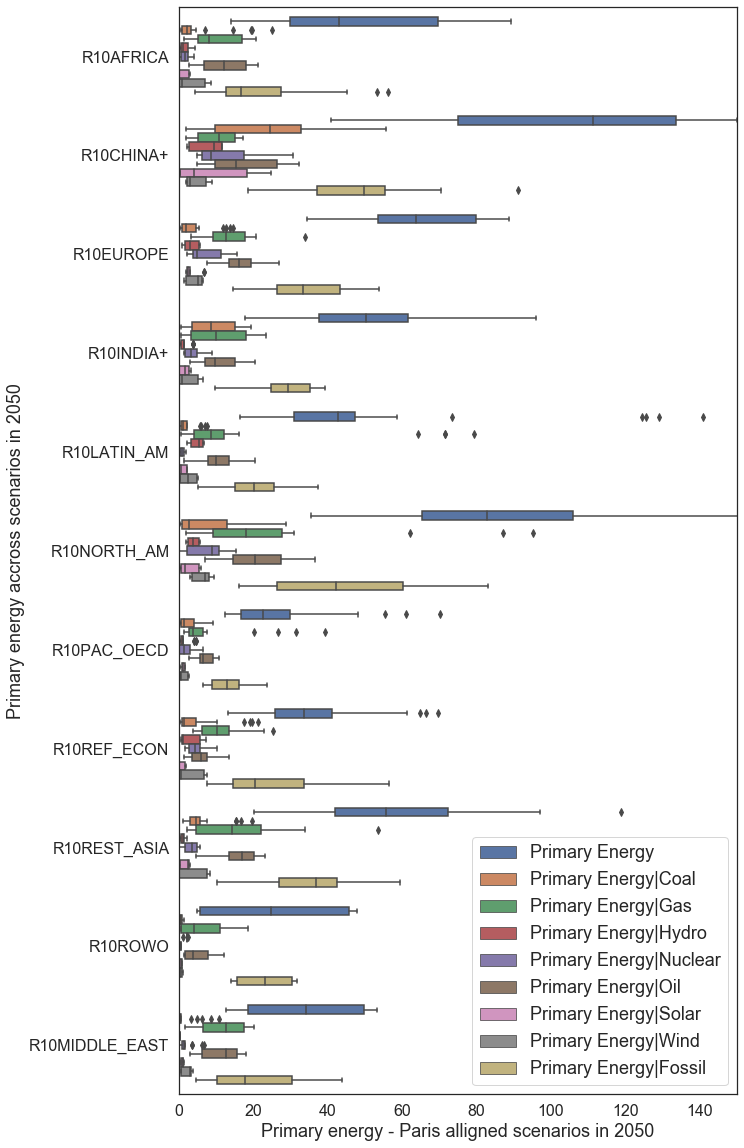

In [42]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 150)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})


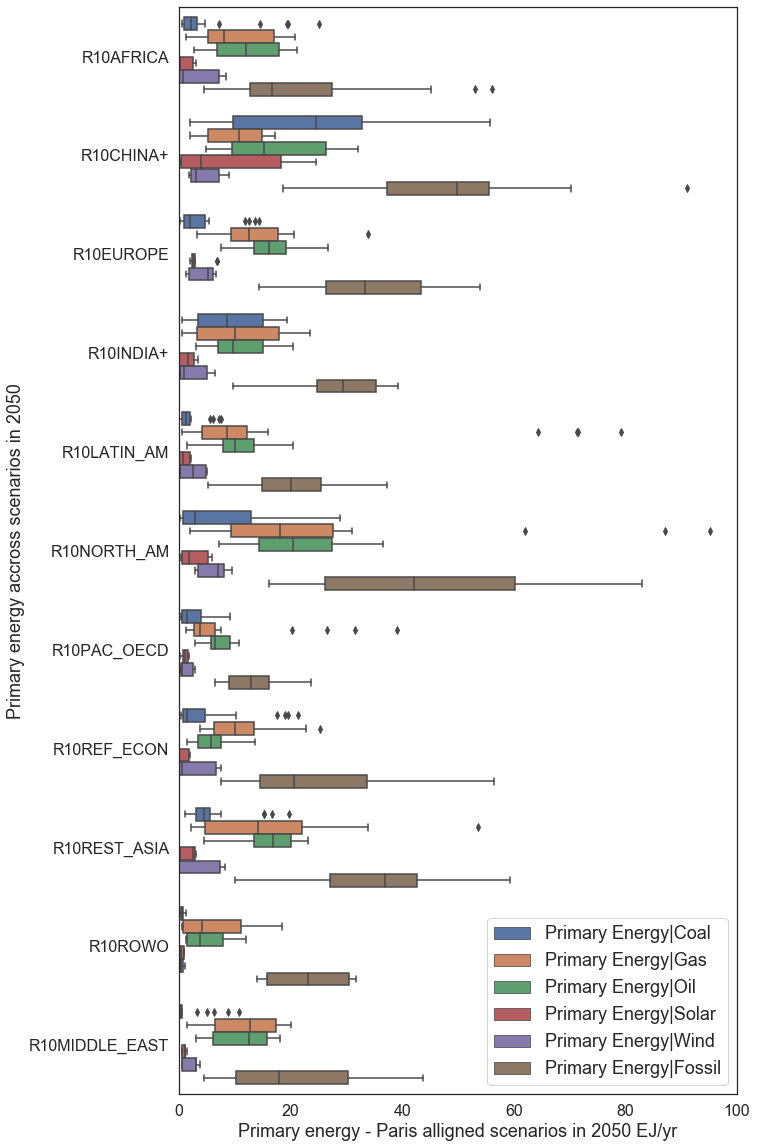

In [52]:
# change picture size of the resulting graph
sns.set(rc={'figure.figsize':(10,20)})


# change the background color
sns.set_style("white")

#plot energy data 
sns.boxplot(y='region', x=2050, data=ipcc_s, hue = "variable", orient="h")
plt.ylabel('Primary energy accross scenarios in 2050', size = 18)
plt.yticks(size = 16)
plt.yticks(size = 16)
plt.xlim(0, 100)

plt.xlabel('Primary energy - Paris alligned scenarios in 2050 EJ/yr', size = 18)
plt.xticks(size = 16);

plt.legend(prop={'size': 18})
